## Import libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sig_seasontrans import SMSig

# Specify current directory create output directory if it does not exist
os.getcwd()


'g:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\libs\\SMSig'

In [2]:
def to_datetime(df, time_column, format="%Y-%m-%d %H:%M:%S"):
    df = df.copy()
    df[time_column] = pd.to_datetime(df[time_column], format=format)
    return df.set_index(time_column)

# Test if signatures/parameters fits well for observed data

## Coweeta

In [3]:
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
site = "Coweeta"
test_file = "test_daily_2014_2018_sm_basinavg.csv"

In [4]:
_data = pd.read_csv(os.path.join(home_dir,"data", site, test_file))
_data = to_datetime(_data, "Time")
data = _data["Soil Moisture Content"]

data.head()

Time
2015-08-04    0.153545
2015-08-05    0.151452
2015-08-06    0.164292
2015-08-07    0.164678
2015-08-08    0.159843
Name: Soil Moisture Content, dtype: float64

In [5]:
# Evaluate using seasonal soil moisture signature
sig_obs = SMSig(
    t=data.index.to_numpy(),
    sm=data.to_numpy(),
    plot_results=True,
    verbose=True
)

In [6]:
_t_valley_manual_input = pd.read_csv(os.path.join(home_dir,"data", site, "seasonal_cycel_valleys.csv"), header=None)
t_valley_manual_input = pd.to_datetime(_t_valley_manual_input[0])
t_valley_manual_input

0   2015-08-09
1   2016-09-17
2   2017-08-06
3   2018-05-07
Name: 0, dtype: datetime64[ns]

Processing 2015:0
dry2wet Shift=0.22 slope=0.00107 start timing: 13.874987 end timing: 84.266358


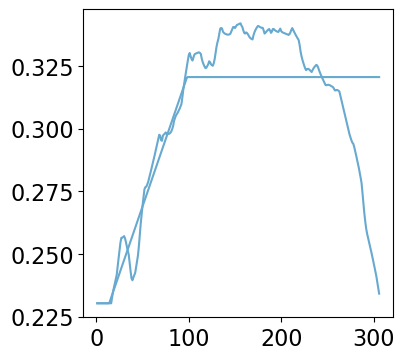

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2016:0
dry2wet Shift=-0.34 slope=0.00629 start timing: 77.783461 end timing: 24.040490


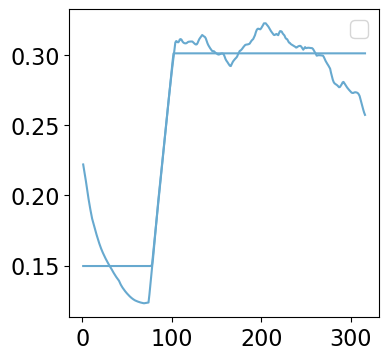

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2017:0
dry2wet Shift=0.20 slope=0.00076 start timing: 64.064302 end timing: 85.030876


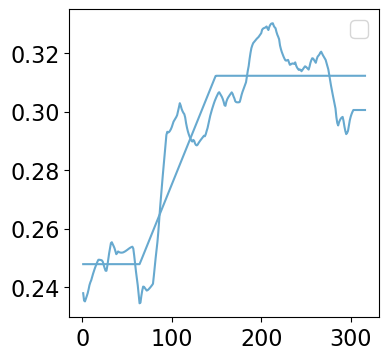

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2015:1
wet2dry Shift=0.34 slope=-0.00042 start timing: 50.000000 end timing: 268.000000


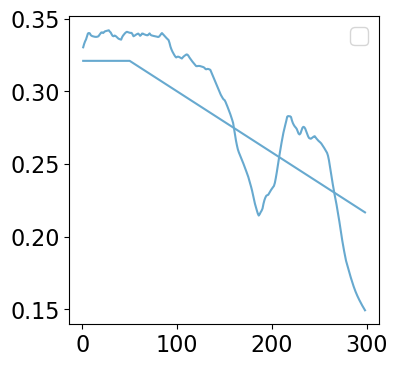

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2016:1
wet2dry Shift=0.34 slope=-0.00044 start timing: 50.000000 end timing: 186.000000


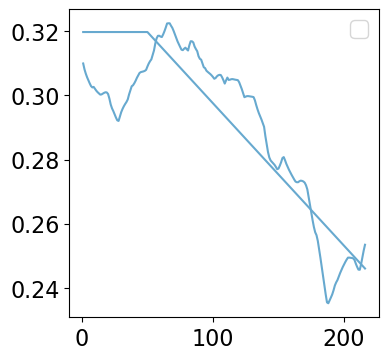

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2017:1
wet2dry Shift=0.40 slope=-0.00063 start timing: 130.105066 end timing: 137.000000


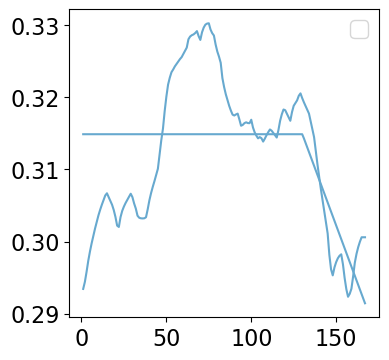

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[2457252.37498734 2457336.64134534 2457416.49999997 2457684.49999997]
 [2457711.28346078 2457735.32395066 2457821.50000029 2458007.50000029]
 [2458020.56430178 2458105.59517753 2458224.60506556 2458361.60506556]
 [             nan              nan              nan              nan]]


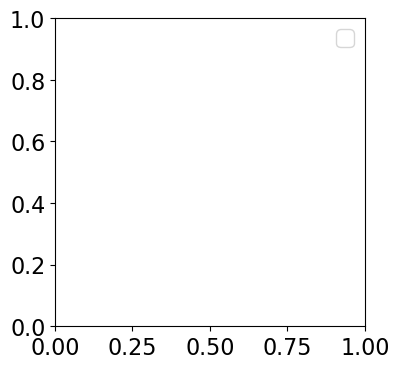

In [7]:
season_trans_obs = sig_obs.calc_seasontrans(t_valley=t_valley_manual_input)
print(season_trans_obs)

NameError: name 'start_dates_obs' is not defined

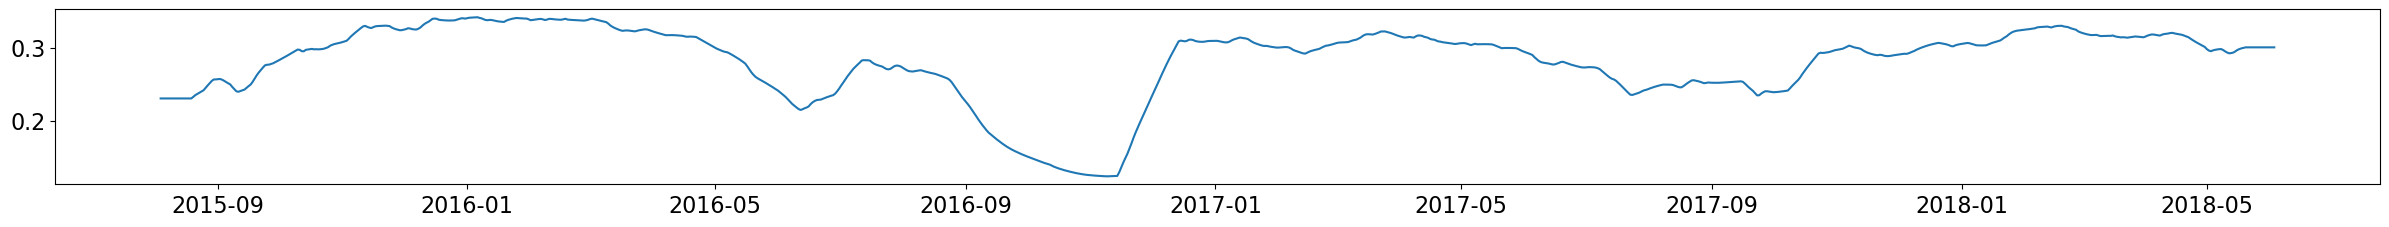

In [8]:
# Plot out the results
# df_obs = obs_synced
# df_sim = sim_synced
obs_label = 'Observed'
sim_label = 'Simulated'
obs_color = '#1f77b4'
sim_color = '#ff7f0e'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.png'

# Relative values of SM 
f2 = plt.figure(figsize=(30, 5))
ax2 = f2.add_subplot(2,1,1)
ax2.plot(sig_obs.tt.index, sig_obs.tt.values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(sig_sim.tt.index, sig_sim.tt.values, alpha=1, label=sim_label, color=sim_color)
# ax2.plot(df["Time"].values, df_obs[var_name].values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(df["Time"].values, df_sim[var_name].values, alpha=1, label=sim_label, color=sim_color)
for i in range(len(start_dates_obs)):
    ax2.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax2.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
# for i in range(len(start_dates_sim)):
#     ax2.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
# for i in range(len(end_dates_sim)):
#     ax2.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel(y_label)
ax2.set_title(title)
ax2.legend()

# f2.savefig(os.path.join(out_path, fn), dpi=600)
season_trans_obs, start_dates_obs, end_dates_obs

# Save the results


## Mahurangi

In [ ]:
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
site = "Mahurangi"
test_file = "test_daily_1998_2001_sm_basinavg.csv"

In [ ]:
_data = pd.read_csv(os.path.join(home_dir, "data", site, test_file))
_data = to_datetime(_data, "Time", format= r"%Y-%m-%d")
data = _data["Soil Moisture Content"]

data.head()

Time
1998-02-20    0.352933
1998-02-21    0.356116
1998-02-22    0.370902
1998-02-23    0.370510
1998-02-24    0.382052
Name: Soil Moisture Content, dtype: float64

In [ ]:
# Evaluate using seasonal soil moisture signature
sig_obs = SMSig(
    t=data.index.to_numpy(),
    sm=data.to_numpy(),
    plot_results=True,
    verbose=True
)
# # sig_obs.detrend() # TODO:debug
# sig_obs.movmean()
# t_valley = sig_obs.calc_sinecurve()
# print(t_valley)

In [ ]:
_t_valley_manual_input = pd.read_csv(r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\Mahurangi\seasonal_cycel_valleys.csv", header=None)
t_valley_manual_input = pd.to_datetime(_t_valley_manual_input[0])
t_valley_manual_input

0   1998-02-16
1   1999-02-16
2   2000-02-16
3   2001-02-15
4   2002-02-15
5   2003-02-15
Name: 0, dtype: datetime64[ns]

Processing 1998:0
dry2wet Shift=0.37 slope=0.00086 start timing: 9.988010 end timing: 110.789054


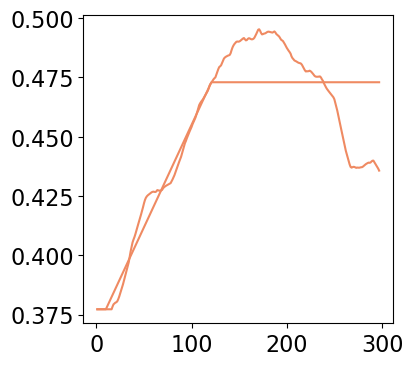

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 1999:0
dry2wet Shift=0.34 slope=0.00105 start timing: 36.219289 end timing: 93.865980


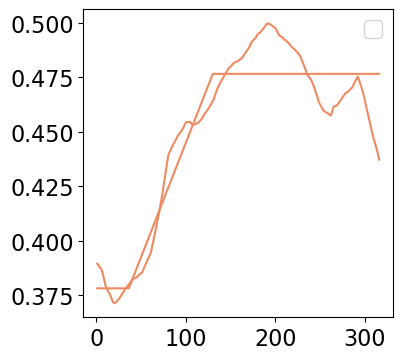

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2000:0
dry2wet Shift=0.23 slope=0.00194 start timing: 71.924732 end timing: 46.518686


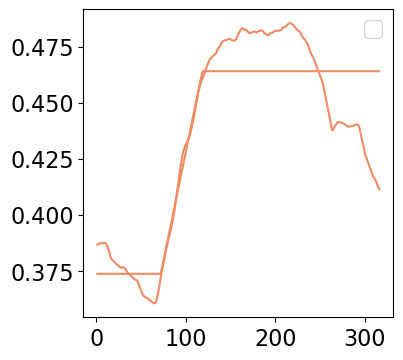

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2001:0
dry2wet Shift=0.39 slope=0.00054 start timing: 0.577108 end timing: 128.895661


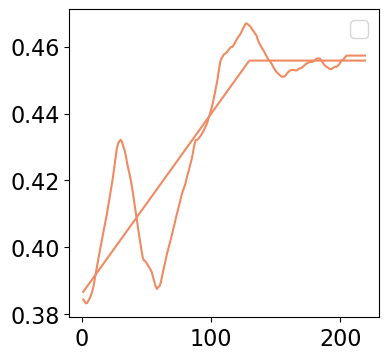

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2002:0
data is not good
Timeseries is empty


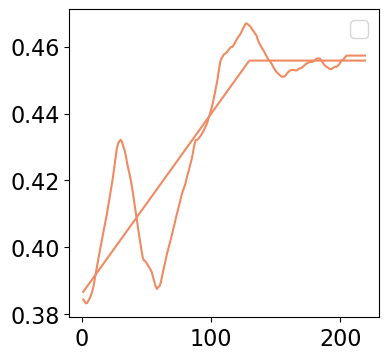

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 1998:1
wet2dry Shift=0.50 slope=-0.00044 start timing: 50.000000 end timing: 228.000000


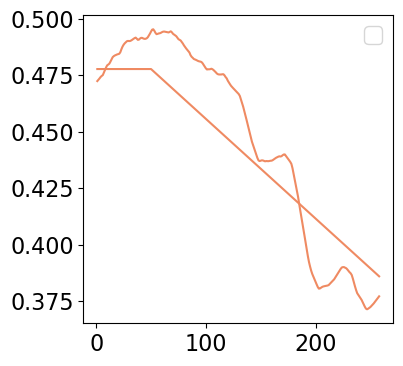

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 1999:1
wet2dry Shift=0.50 slope=-0.00040 start timing: 50.000000 end timing: 228.000000


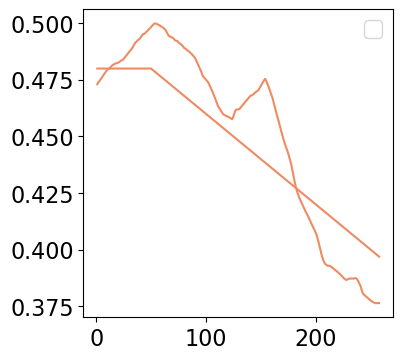

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2000:1
wet2dry Shift=0.50 slope=-0.00042 start timing: 50.000000 end timing: 228.000000


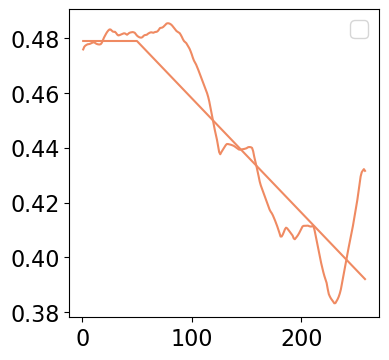

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2001:1
data is not good
Length of the timeseries is less than 90 days


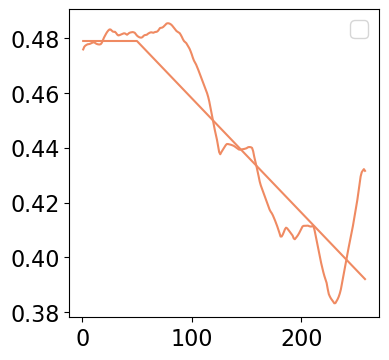

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2002:1
data is not good
Timeseries is empty


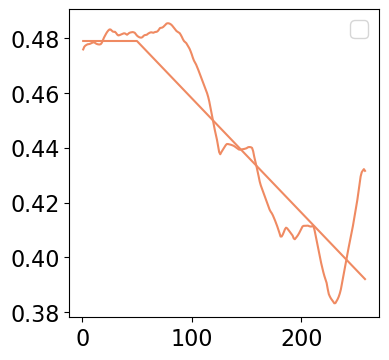

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


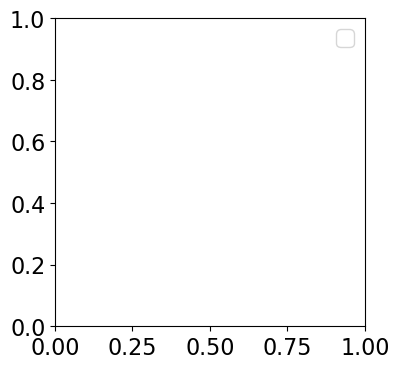

In [ ]:
season_trans_obs, start_dates_obs, end_dates_obs = sig_obs.calc_seasontrans(t_valley=t_valley_manual_input)

(array([[2450874.48801037, 2450985.27706444, 2451063.49892274,
         2451261.49892274],
        [2451249.2146595 , 2451340.54000311, 2451428.49908518,
         2451626.49908518],
        [2451648.72761903, 2451694.01322899, 2451793.50000001,
         2451991.50000001],
        [             nan,              nan,              nan,
                      nan],
        [             nan,              nan,              nan,
                      nan],
        [             nan,              nan,              nan,
                      nan]]),
 [Timestamp('1998-03-01 23:42:44.095603'),
  Timestamp('1999-03-11 17:09:06.581008'),
  Timestamp('2000-04-14 05:27:46.284559'),
  Timestamp('2001-02-08 10:24:48.426300'),
  Timestamp('1998-09-06 23:58:26.924653'),
  Timestamp('1999-09-06 23:58:40.959743'),
  Timestamp('2000-09-06 00:00:00.000479')],
 [Timestamp('1998-06-20 18:38:58.367507'),
  Timestamp('1999-06-11 00:57:36.268464'),
  Timestamp('2000-05-29 12:19:02.984401'),
  Timestamp('2001-06-

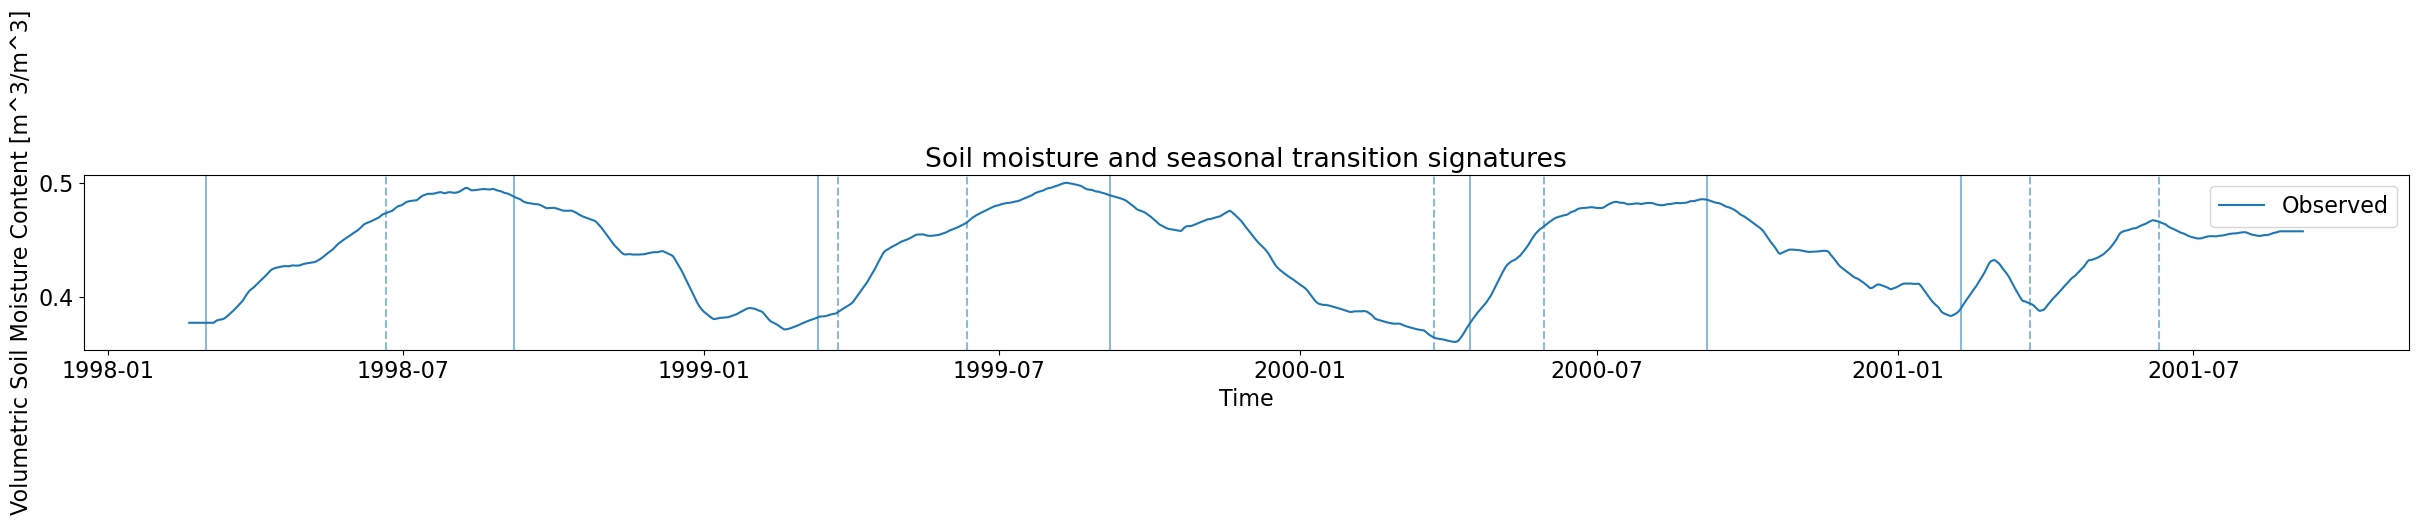

In [ ]:

# Plot out the results
# df_obs = obs_synced
# df_sim = sim_synced
obs_label = 'Observed'
sim_label = 'Simulated'
obs_color = '#1f77b4'
sim_color = '#ff7f0e'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.png'

# Relative values of SM 
f2 = plt.figure(figsize=(30, 5))
ax2 = f2.add_subplot(2,1,1)
ax2.plot(sig_obs.tt.index, sig_obs.tt.values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(sig_sim.tt.index, sig_sim.tt.values, alpha=1, label=sim_label, color=sim_color)
# ax2.plot(df["Time"].values, df_obs[var_name].values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(df["Time"].values, df_sim[var_name].values, alpha=1, label=sim_label, color=sim_color)
for i in range(len(start_dates_obs)):
    ax2.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax2.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
# for i in range(len(start_dates_sim)):
#     ax2.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
# for i in range(len(end_dates_sim)):
#     ax2.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel(y_label)
ax2.set_title(title)
ax2.legend()

# f2.savefig(os.path.join(out_path, fn), dpi=600)
season_trans_obs, start_dates_obs, end_dates_obs

# Save the results